In [9]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../01-intro/car_fuel_efficiency.csv")

In [8]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
cols = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [5]:
df[cols].isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [6]:
df['horsepower'].median()

np.float64(149.0)

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [12]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [14]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [ ]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
246,170,3.0,164.0,2990.040917,9.7,2019,Europe,Diesel,Front-wheel drive,0.0,15.963019
8125,170,4.0,NaN,2729.623741,13.2,2012,USA,Gasoline,All-wheel drive,0.0,15.931964
1927,200,4.0,142.0,3126.513375,17.3,2019,Asia,Diesel,All-wheel drive,0.0,14.284901
8235,200,3.0,148.0,3136.477901,15.5,2003,USA,Diesel,Front-wheel drive,-2.0,14.865210
424,230,4.0,141.0,3384.681613,15.9,2006,USA,Gasoline,Front-wheel drive,-3.0,12.428822


In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
df_train_fill_0 = df_train.copy()
df_train_fill_0['horsepower'] = df_train_fill_0['horsepower'].fillna(0)
df_train_fill_median = df_train.copy()
df_train_fill_median['horsepower'] = df_train_fill_median['horsepower'].fillna(df_train_fill_median['horsepower'].median())

df_val_fill_0 = df_val.copy()
df_val_fill_0['horsepower'] = df_val_fill_0['horsepower'].fillna(0)
df_val_fill_median = df_val.copy()
df_val_fill_median['horsepower'] = df_val_fill_median['horsepower'].fillna(df_train_fill_median['horsepower'].median())

df_test_fill_0 = df_test.copy()
df_test_fill_0['horsepower'] = df_test_fill_0['horsepower'].fillna(0)
df_test_fill_median = df_test.copy()
df_test_fill_median['horsepower'] = df_test_fill_median['horsepower'].fillna(df_train_fill_median['horsepower'].median())

In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [22]:
df_train_fill_0.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [25]:
cols = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]
cols_train = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
]

In [26]:
# TEST 1 (fill with 0)
y_train = np.log1p(df_train_fill_0.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val_fill_0.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test_fill_0.fuel_efficiency_mpg.values)

In [27]:
w0, w = train_linear_regression(df_train_fill_0[cols_train], y_train)

In [28]:
y_pred = w0 + df_train_fill_0[cols_train].dot(w)

In [29]:
w0

np.float64(3.483634384616227)

In [30]:
w

array([ 7.48585751e-06,  2.43675962e-04, -3.21959038e-04,  1.02373968e-04])

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: ylabel='Count'>

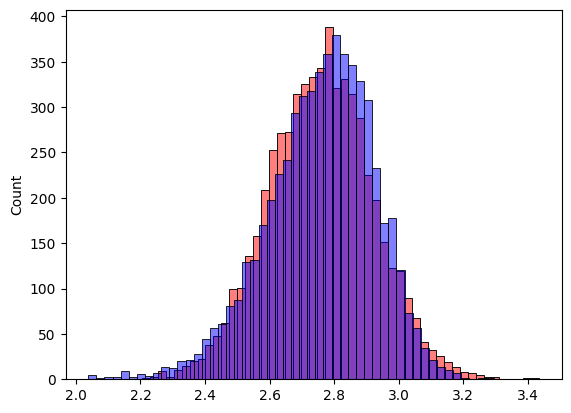

In [ ]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [33]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [35]:
round(rmse(y_train, y_pred), 2)

np.float64(0.04)

In [36]:
# TEST 2 (fill with median)
y_train = np.log1p(df_train_fill_median.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val_fill_median.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test_fill_median.fuel_efficiency_mpg.values)

In [37]:
w0, w = train_linear_regression(df_train_fill_median[cols_train], y_train)

In [38]:
y_pred = w0 + df_train_fill_median[cols_train].dot(w)

In [39]:
w0

np.float64(3.4786321058809166)

In [40]:
w

array([ 1.06574982e-05,  6.74977337e-04, -3.22350319e-04,  7.17886394e-05])

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: ylabel='Count'>

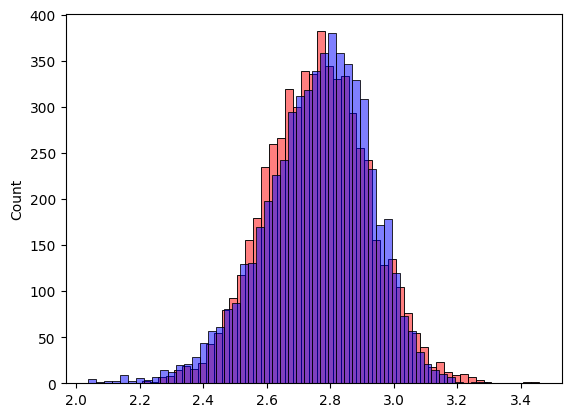

In [42]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [43]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [44]:
round(rmse(y_train, y_pred), 2)

np.float64(0.04)